# Fig 2a. Variance in predictions  Comparative performance of deep learning models on whole genome evaluation at different evaluation thresholds. For each model we show the averaged performance across ENCODE cell lines and across patient data.

The mean and std for the variance (or robustness score) is averaged across chromosomes.

TODO:
- how to handle all models and 8 cell lines? keep it how it is right now so then we have 4 * 8 markers?
- verify if robustness works correctly, scores are weirdly high (Liine)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../robustness.csv')
df

,checkpoint,model,experiment,cell_line,dataset,chrom,variance
0,bounded_LSTM_GM12878sp_fold0_20240204-193606,LSTM,bounded,GM12878sp,peaks,1,0.208595
1,bounded_LSTM_GM12878sp_fold0_20240204-193606,LSTM,bounded,GM12878sp,peaks,11,0.208595
2,bounded_LSTM_GM12878sp_fold0_20240204-193606,LSTM,bounded,GM12878sp,peaks,20,0.208595
3,bounded_LSTM_GM12878sp_fold0_20240204-193606,LSTM,bounded,GM12878sp,peaks,13,0.208595
4,fig1_dCNN_GM12878sp_fold0_20240202-111458,dCNN,fig1,GM12878sp,peaks,1,0.245121
...,...,...,...,...,...,...,...
81,fig1_dCNN_K562sp_fold0_20240202-111636,dCNN,fig1,K562sp,peaks,11,0.146630
82,fig1_dCNN_K562sp_fold0_20240202-111636,dCNN,fig1,K562sp,peaks,20,0.137601
83,fig1_dCNN_GM12878sp_fold4_20240202-111732,dCNN,fig1,GM12878sp,peaks,4,0.451564
84,fig1_dCNN_K562sp_fold0_20240202-111636,dCNN,fig1,K562sp,peaks,13,0.217763


dCNN GM12878sp [0.3012784189659924, 0.3024860732259641, 0.2906630579353328, 0.3661465870030916, 0.3908063143581907, 0.3689565618867838, 0.4511812891705843, 0.4291445292182959] [0.2451207647835958, 0.2362840246125662, 0.2421154943604258, 0.3046307004601819, 0.2894946018185316, 0.2695661012163693, 0.3356784898010653, 0.3467478974384539, 0.3777800373706492, 0.404325959389098, 0.4515641571627474, 0.3941082279515018]
dCNN K562sp [0.2500683866816418, 0.2301705762454373, 0.2368358360798776, 0.1778099561592839, 0.2507367860083049] [0.1994815535200647, 0.1849991025021012, 0.176616012442049, 0.1464111821239061, 0.2050768212353673, 0.1650533056270756, 0.1466295679734557, 0.1376005889946762, 0.2177631295309654]
dCNN HepG2sp [0.4772313472037174, 0.4775723368687998, 0.4145319864462468, 0.6567692041506478] [0.2667636686641721, 0.2432623979755754, 0.2452141355292463, 0.3990151562698473, 0.3094409891234552, 0.3481292767688632, 0.3797450394505156, 0.316411568757787]
dCNN IMR90sp [0.2103562286605625, 0.2

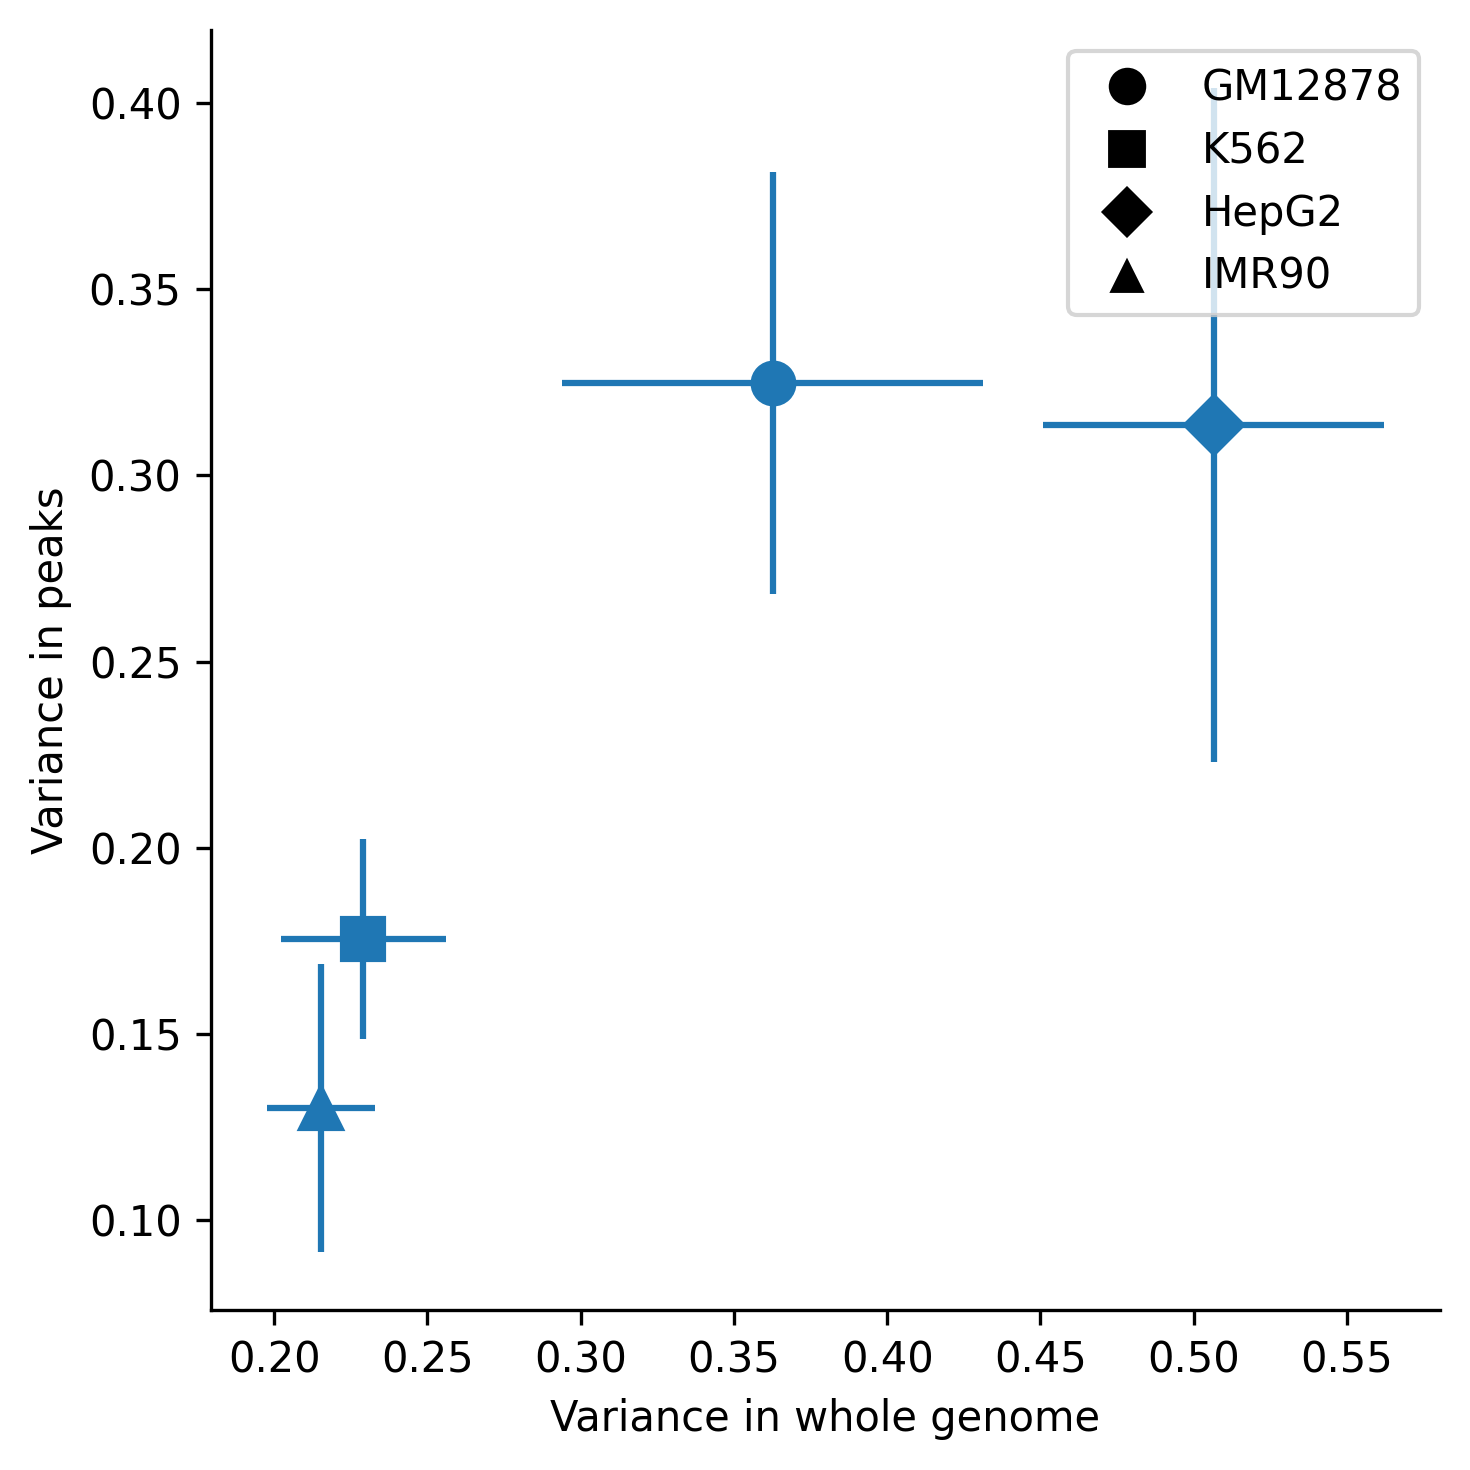

In [9]:
import numpy as np

df = df[df.experiment == 'fig1']
df.dropna(inplace=True)

models = ['dCNN']
cell_lines = df.cell_line.unique().tolist()
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p'][:len(cell_lines)]
legend_handles = [plt.Line2D([0], [0], marker=marker, color='w', markerfacecolor='k', markersize=10, label=cell_line.rstrip('sp')) for marker, cell_line in zip(markers, cell_lines)]

fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

for color, model in zip([f'C{i}' for i in range(len(models))], models):
    for marker, cell_line in zip(markers, cell_lines):
        tmp = df[(df.cell_line == cell_line) & (df.model == model)]
        wg_scores = tmp[tmp.dataset == 'wg'].variance.tolist()
        peak_scores = tmp[tmp.dataset == 'peaks'].variance.tolist()
        print(model, cell_line, wg_scores, peak_scores)

        plt.errorbar([np.mean(wg_scores)], [np.mean(peak_scores)], [np.std(wg_scores)], [np.std(peak_scores)],
                     label=f'{model}_{cell_line}', marker=marker, c=color,
                     capsize=0, markersize=10)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

ax.set_ylabel('Variance in peaks')
ax.set_xlabel('Variance in whole genome')
plt.tight_layout()
plt.legend(handles=legend_handles)

plt.savefig('fig2a.svg', format='svg')